In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [2]:
import pandas as pd

# Data extracted from the image
data_dic = {
    "X1": [30.7, 32.2, 27.2, 31.1, 29.4, 28.4, 29.5, 30.4, 34.4, 33.4, 28.3, 33.7, 30.9, 29.9, 30.9],
    "X2": [15.2, 16.1, 14.7, 16.7, 16.4, 14.7, 13.7, 15.8, 18.7, 17.2, 15, 17.6, 15.2, 15.2, 14.8],
    "X3": [294.6, 292.5, 295.9, 299.3, 293.8, 302.1, 286.6, 294.8, 305.5, 290.4, 296.1, 295.6, 293.7, 295, 286.3],
    "X4": [75.6, 76.9, 77.5, 79.2, 87.2, 73.5, 75.4, 74.6, 75, 78, 78.8, 76, 76.6, 75.5, 78.4]
}

# Create the DataFrame
data = pd.DataFrame(data_dic)
data

,X1,X2,X3,X4
0,30.7,15.2,294.6,75.6
1,32.2,16.1,292.5,76.9
2,27.2,14.7,295.9,77.5
3,31.1,16.7,299.3,79.2
4,29.4,16.4,293.8,87.2
5,28.4,14.7,302.1,73.5
6,29.5,13.7,286.6,75.4
7,30.4,15.8,294.8,74.6
8,34.4,18.7,305.5,75.0
9,33.4,17.2,290.4,78.0


periodically measures four quality variables, x1, x2, x3, x4 taking 
a wine sample from randomly selected barrels

a)The wine maker is interested in using the PCA to analyze these data. Would it be more appropriate to use 
the sample variance-covariance matrix or the sample correlation matrix to estimate the principal 
components? 

In [3]:
print(data['X1'].mean())
print(data['X1'].std())

print(data['X2'].mean())
print(data['X2'].std())

print(data['X3'].mean())
print(data['X3'].std())

print(data['X4'].mean())
print(data['X4'].std())

#capire quale usare è una cosa che si fa ad cchio diciamo, se fosse solo per le prime due 
#potrebbe starci usare la cov ma nel complesso viste x3 e x4 (x3 soprattutto dove la media è anche 10 volte 
#più alta e la varianza praticamente 4 volte rispetto a x2) è meglio usare la correlation matrix

30.693333333333328
2.063792163769912
15.799999999999999
1.3207140925596708
294.81333333333333
5.056801172207397
77.21333333333334
3.2137798543741236


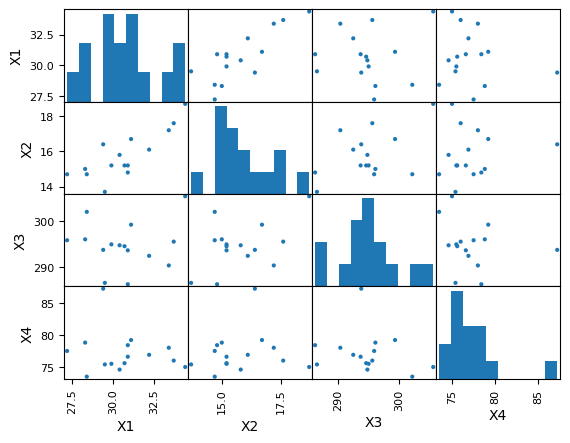

In [4]:
mf.scatter_b_vars(data)

Estimate the PCA model for data in Table 2 by retaining the number of principal components required to 
capture at least 75% of the overall variability (report the eigenvalues and eigenvectors of retained PCs). 

In [5]:
[pca,scores_df]=mf.p_pca(data, len(data), standardize='yes')


Eigenvalues 
 [1.99454216 1.11505165 0.86217258 0.0282336 ]

Eigenvectors aka Loadings 
 [[ 0.60527472  0.67863121  0.40607559 -0.09058043]
 [ 0.15944656  0.23445404 -0.43934179  0.85240066]
 [-0.51799803  0.08802072  0.72451121  0.44610975]
 [-0.58300716  0.69046603 -0.34229361 -0.25728271]]

Explained variance ratio 
 [0.49863554 0.27876291 0.21554315 0.0070584 ]

Cumulative explained variance ratio 
 [0.49863554 0.77739845 0.9929416  1.        ]
first 5 rows of the df scores:
         z1        z2        z3        z4
0 -0.278006 -0.515372 -0.296176 -0.171964
1  0.419094  0.287539 -0.733106 -0.087111
2 -1.510572 -0.483542  0.998977  0.315260
3  0.886019  0.328309  0.876509 -0.107109
4 -0.433858  2.743425  1.605685 -0.051865


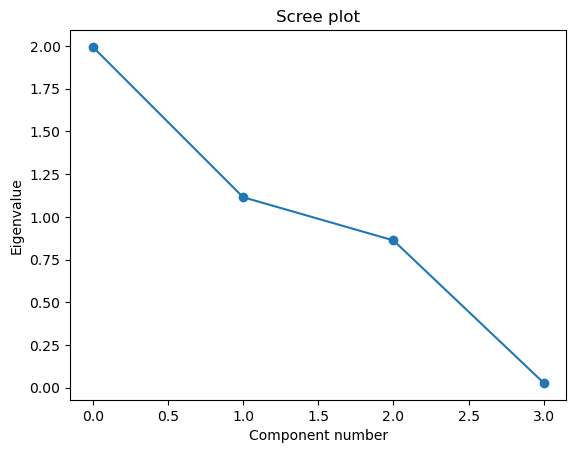

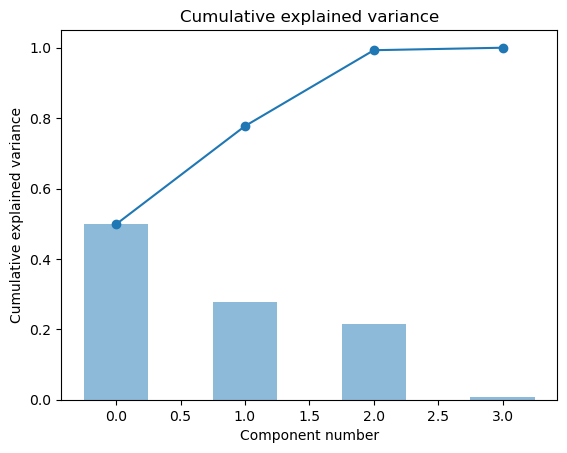

In [6]:
mf.screeplotandcumexplvar(pca)

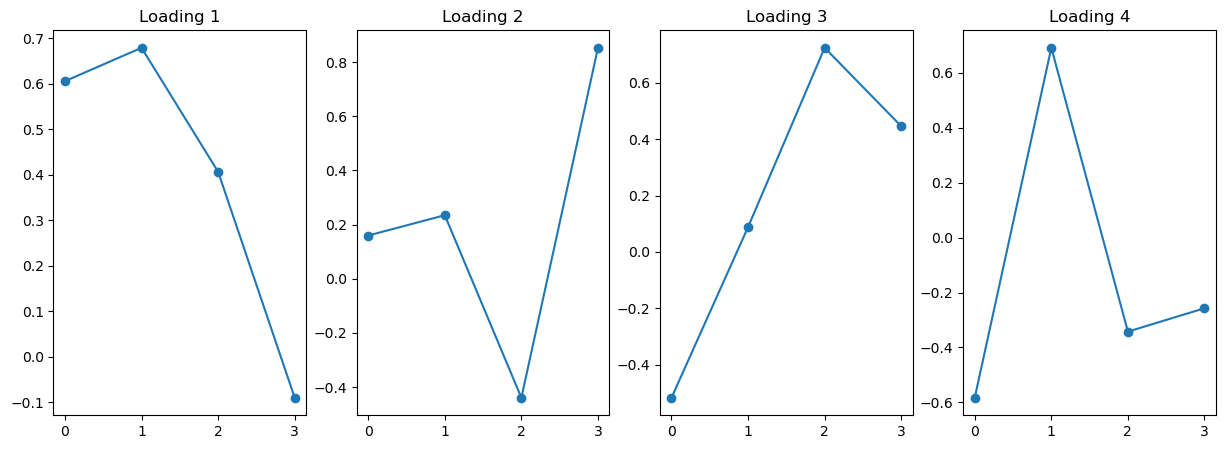

In [7]:
mf.plotloadings(pca)

le prime due bastano per mantenere il 75%!

c) Based on the result of point b), design a Hotelling’s 𝑇2 control chart for the wine data with 𝐴𝑅𝐿0=200. 
Can we conclude that the barrel aging process is stable and in-control? 

In [8]:
ARL=200
alpha=1/200
k_alpha=stats.norm.ppf(1-alpha/2)

In [9]:
scores_df_12=scores_df.iloc[:,0:2]

p-value of the Shapiro-Wilk test: 0.280


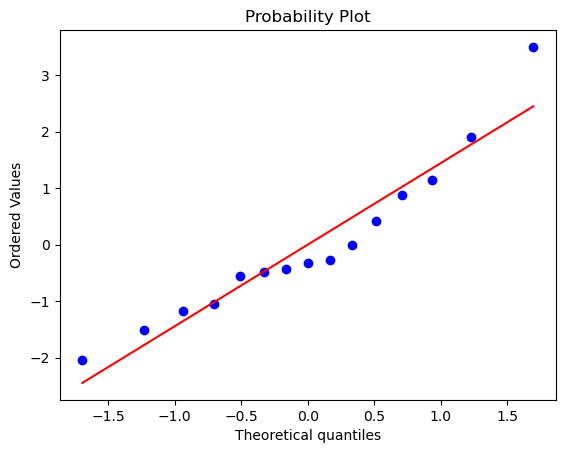

Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.159


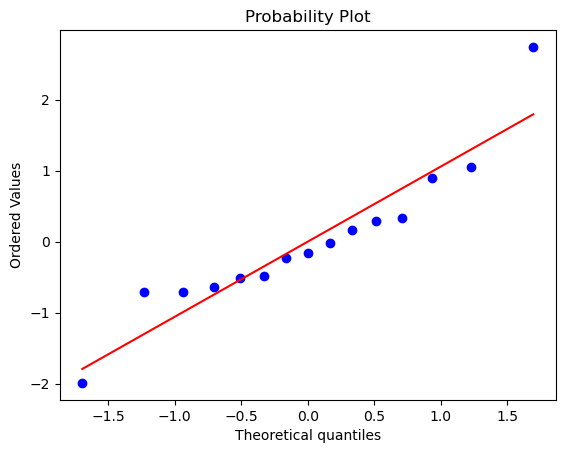

Accept H0: the data are normal
Runs test statistic = 0.812
Runs test p-value = 0.417
Accept H0: the data are random
Runs test statistic = 1.008
Runs test p-value = 0.313
Accept H0: the data are random


In [10]:
#checckare le assumption di NID
mf.shapiroqq(scores_df_12['z1'])
mf.shapiroqq(scores_df_12['z2'])
mf.runs(scores_df_12['z1'])
mf.runs(scores_df_12['z2'])

In [11]:
Xbar = scores_df_12.mean()

In [12]:
V = scores_df_12.diff().dropna() #matrice (m-1)x(p)
m=len(scores_df_12)
# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1) #Short range estimator

# Display the short range estimator
print("The short range estimator is: \n", S2)


The short range estimator is: 
           z1        z2
z1  1.961813 -0.136413
z2 -0.136413  1.443793


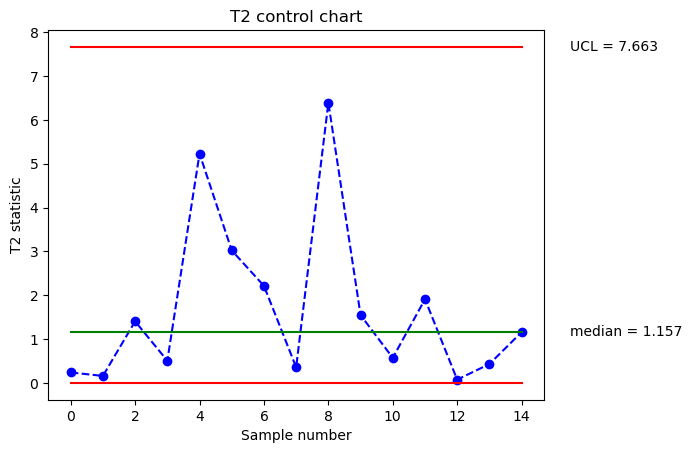

In [13]:
[UCL,data_CC]=mf.T2cc_n_1(2,m,alpha,scores_df_12,Xbar,S2)

d)How do the result of point c) changes if the Hotelling’s 𝑇2 control chart is designed using m+1 principal 
components, where m is the number of PCs used in point c)? Discuss the results. 

p-value of the Shapiro-Wilk test: 0.254


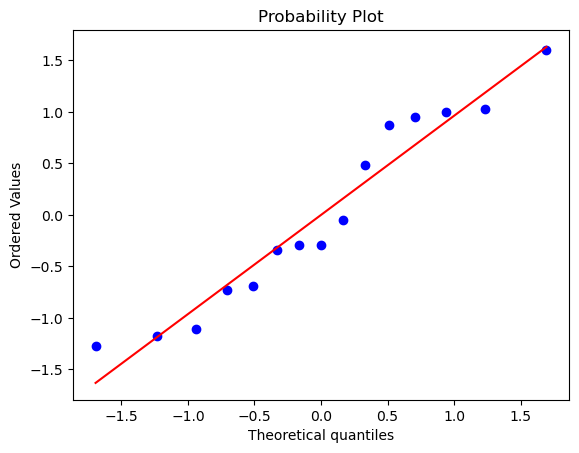

Accept H0: the data are normal
Runs test statistic = -0.672
Runs test p-value = 0.502
Accept H0: the data are random
The short range estimator is: 
           z1        z2        z3
z1  1.961813 -0.136413 -0.084393
z2 -0.136413  1.443793 -0.324860
z3 -0.084393 -0.324860  0.781268


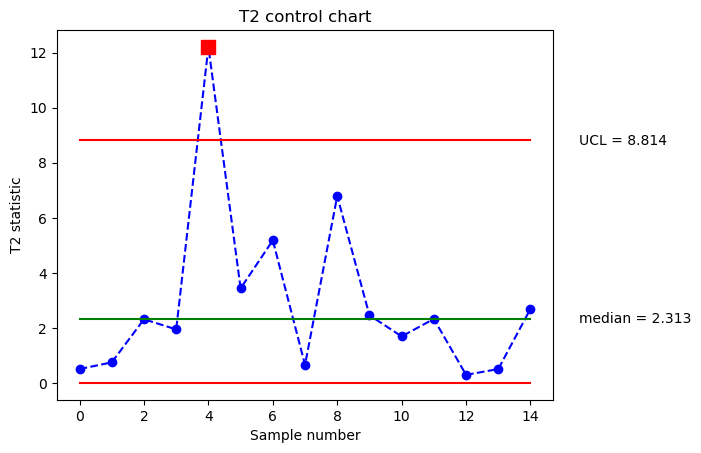

In [14]:
scores_df_13=scores_df.iloc[:,0:3]
mf.shapiroqq(scores_df_13['z3'])
mf.runs(scores_df_13['z3'])
Xbar = scores_df_13.mean()
V = scores_df_13.diff().dropna() #matrice (m-1)x(p)
m=len(scores_df_13)
# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1) #Short range estimator

# Display the short range estimator
print("The short range estimator is: \n", S2)
[UCL,data_CC]=mf.T2cc_n_1(3,m,alpha,scores_df_13,Xbar,S2)

Now, sample 5 is out of control. The anomaly in sample 5 corresponds to a peak in variable x4. When only 
the first 2 PCs are monitored, sample 5 is a bit outlying along PC2, as shown in the figure below where 
sample 5 is highlighted in red (note that PC2 associates a high weight to variable x4), but not enough to 
signal an alarm. When the third PC is included, the sample 5 anomaly is emphasized in the space spanned by 
PC2 and PC3, as shown below. 
In the presence of the violation of the control limit at sample 5, a search for assignable causes shall be carried 
out. In the absence of further information, the control chart design phase is over.

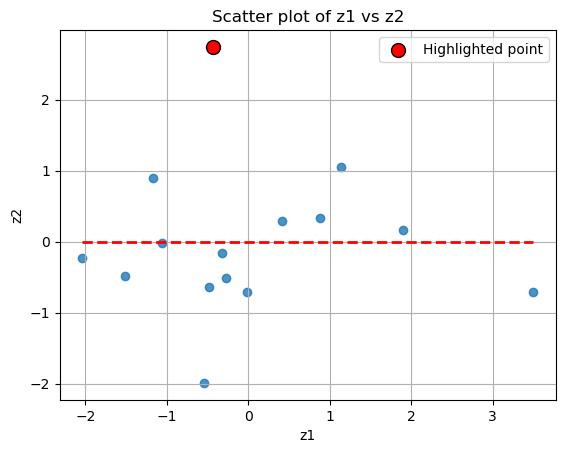

In [15]:
mf.scatter_plot_nice_h(scores_df_13,'z1','z2',4)
#estremino nello spazio z1-z2

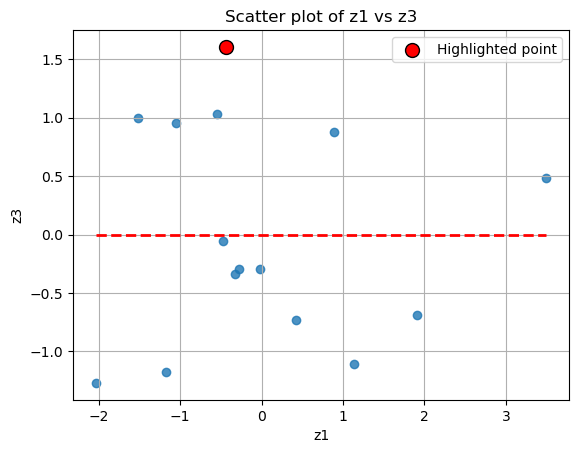

In [16]:
mf.scatter_plot_nice_h(scores_df_13,'z1','z3',4)
#estremino nello spazio z2 e z3


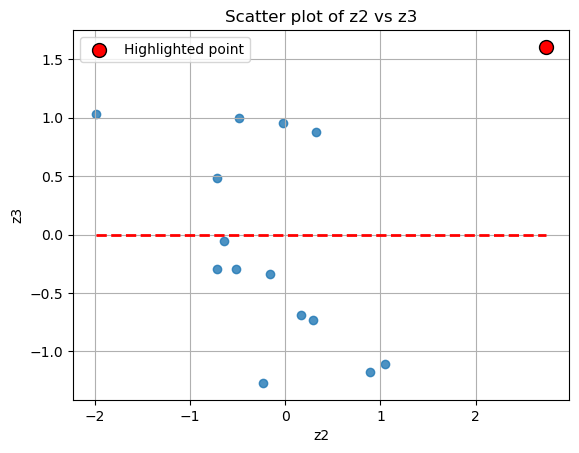

In [17]:
mf.scatter_plot_nice_h(scores_df_13,'z2','z3',4)
#molto estremo come punto nello spazio z2-z3!!!
#infatti sia z2 che z3 associano un grande peso a x4 che è la var più pesante 
#nel sample 5

The wine maker decides to extend the data collection for a longer period. Based on the collection of 100 
samples, he estimates the following sample mean and variance-covariance matrix:....
Design a statistical test to determine if the variances explained, respectively, by the first and second PC 
estimated from the new data are statistically different from the ones estimated from data in Table 2 (use a 
familywise confidence level 𝛼=0.05; assume that the new sample is random, normal and independent 
from the data sample in Table 2).  

In [18]:
Xbarbar = pd.Series({'xbar1':28.85, 'xbar2': 12,'xbar3':288, 'xbar4':75})
S = pd.DataFrame([[1.4, 0.75,0.1,0.5],
                [0.75,1.3,1.7,0.5], [0.1,1.7,6.6,0.3],
                [0.5,0.5,0.3,3.6]],
                columns=['xbar1', 'xbar2','xbar3','xbar4'],
                index=['xbar1', 'xbar2','xbar3','xbar4'])


In [22]:
std_devs = np.sqrt(np.diag(S))

# Create the correlation matrix
R = S.copy()
for i in range(len(S)):
    for j in range(len(S)):
        R.iloc[i, j] = S.iloc[i, j] / (std_devs[i] * std_devs[j])

print(R)

          xbar1     xbar2     xbar3     xbar4
xbar1  1.000000  0.555937  0.032898  0.222718
xbar2  0.555937  1.000000  0.580370  0.231125
xbar3  0.032898  0.580370  1.000000  0.061546
xbar4  0.222718  0.231125  0.061546  1.000000


In [23]:
[eigenvalues, eigenvectors,cumulative_explained_variance_ratio]=mf.compute_eigens(R)
#in questo caso i loadings sono sulle colonne a quanto pare, al contrario di quando uso pca.fit()

[1.92195944 1.04960724 0.81681769 0.21161563]
[[-0.49491197  0.45953531  0.56397526 -0.47520663]
 [-0.66653351 -0.1430445   0.13717711  0.71864719]
 [-0.45841839 -0.67508291 -0.27884234 -0.50632262]
 [-0.31725037  0.55913204 -0.76508908 -0.03690897]]
[0.48048986 0.74289167 0.94709609 1.        ]


In [24]:
var1_new=1.92195944
var2_new=1.04960724 
n_new=100
var1_old=1.99454216 
var2_old=1.11505165
n_old=15
alpha_family=0.05
alpha_single=1-(1-alpha_family)**(1/2)
CL=1-alpha_single

In [27]:
#FIRST
F0 = var1_new/var1_old #F statistic
df1 = n_new - 1 # degrees of freedom for supplier 
df2 = n_old - 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.3f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)
print('p-value for F-test for equal variances: %.3f' % p_value_F0)


Confidence interval on the ratio of variances (CL = 0.975): [0.237, 2.561]
p-value for F-test for equal variances: 0.847


In [28]:
#SECOND:
F0 = var2_new/var2_old #F statistic
df1 = n_new - 1 # degrees of freedom for supplier 
df2 = n_old - 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.3f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)
print('p-value for F-test for equal variances: %.3f' % p_value_F0)

Confidence interval on the ratio of variances (CL = 0.975): [0.231, 2.502]
p-value for F-test for equal variances: 0.801


In [52]:
#eg. we know that V(a'x)=a'Ra
a = np.array([[0.5], [0.5], [0.5], [0.5]]) #column vector
a_t=np.transpose(a) #row vector
R_times_a=np.dot(R, a)
var_lin_comb_naive= np.dot(a_t, R_times_a)

print(float(var_lin_comb_naive[0,0]))

v1 = np.array([[-0.4964], [-0.6674], [-0.4577], [-0.3145]]) #first eigenvector
v1_t=np.transpose(v1) #row vector
R_times_v1=np.dot(R, v1)
lmbda1= (np.dot(v1_t, R_times_v1))
print(float(lmbda1[0,0]))


1.8422967658933804
1.9223993762708578
